# bank client data:
 1 - age (numeric)
 2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
 3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' mean
 1 - age (numeric)
 2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
 3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowe
 4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
 5 - default: has credit in default? (categorical: 'no','yes','unknown')
 6 - housing: has housing loan? (categorical: 'no','yes','unknown')
 7 - loan: has personal loan? (categorical: 'no','yes
 # related with the last contact of the current campaign:
 8 - contact: contact communication type (categorical: 'cellular','telephone')
 9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
 10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fr
 11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
 # other attributes:
 12 - campaign: number of contacts performed during th
 12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
 13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
 14 - previous: number of contacts performed before this campaign and for this client (numeri
 15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
 # social and economic context attributes
 16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
 17 - cons.price.idx: consumer price index - monthly indicator (numer
 18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
 19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
 20 - nr.employed: number of employees - quarterly indicator (numeric)
 21 - y - has the client subscribed a term deposit? (binary: 'yes','no')ic)c)isi')','d)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("bank-full.csv")
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


#clustering

In [7]:
#there is no need to train test split but we need to convert ctegorical variables ones and also scale data asdistance is the key faster in clustering

In [8]:
x=pd.get_dummies(df).astype(int)
x

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,subscribed_no,subscribed_yes
0,56,261,1,999,0,1,93,-36,4,5191,...,0,1,0,0,0,0,1,0,1,0
1,57,149,1,999,0,1,93,-36,4,5191,...,0,1,0,0,0,0,1,0,1,0
2,37,226,1,999,0,1,93,-36,4,5191,...,0,1,0,0,0,0,1,0,1,0
3,40,151,1,999,0,1,93,-36,4,5191,...,0,1,0,0,0,0,1,0,1,0
4,56,307,1,999,0,1,93,-36,4,5191,...,0,1,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1,94,-50,1,4963,...,1,0,0,0,0,0,1,0,0,1
41184,46,383,1,999,0,-1,94,-50,1,4963,...,1,0,0,0,0,0,1,0,1,0
41185,56,189,2,999,0,-1,94,-50,1,4963,...,1,0,0,0,0,0,1,0,1,0
41186,44,442,1,999,0,-1,94,-50,1,4963,...,1,0,0,0,0,0,1,0,0,1


In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
scaler=StandardScaler()
scaled_x=scaler.fit_transform(x)

In [11]:
scaled_x

array([[ 1.53303429,  0.01047142, -0.56592197, ..., -0.1857    ,
         0.35630932, -0.35630932],
       [ 1.62899323, -0.42150051, -0.56592197, ..., -0.1857    ,
         0.35630932, -0.35630932],
       [-0.29018564, -0.12451981, -0.56592197, ..., -0.1857    ,
         0.35630932, -0.35630932],
       ...,
       [ 1.53303429, -0.26722482, -0.20490853, ..., -0.1857    ,
         0.35630932, -0.35630932],
       [ 0.38152696,  0.70856893, -0.56592197, ..., -0.1857    ,
        -2.80655022,  2.80655022],
       [ 3.26029527, -0.07438021,  0.15610492, ..., -0.1857    ,
         0.35630932, -0.35630932]])

In [12]:
from sklearn.cluster import KMeans

In [13]:
model=KMeans(n_clusters=3,random_state=42)

In [14]:
cluster_labels=model.fit_predict(scaled_x)

In [15]:
cluster_labels

array([2, 2, 2, ..., 1, 1, 1])

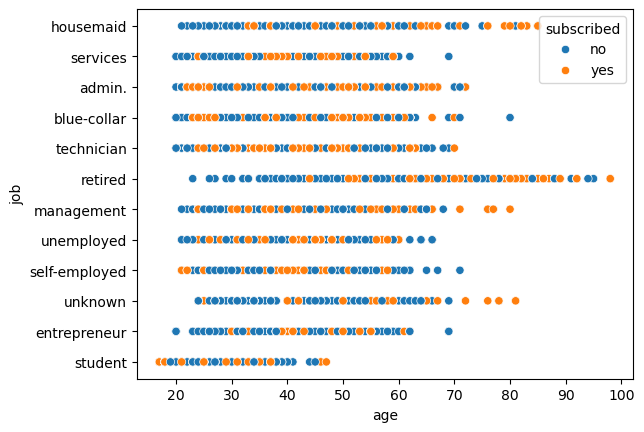

In [16]:
sns.scatterplot(df,x="age",y="job",hue="subscribed")
plt.show()

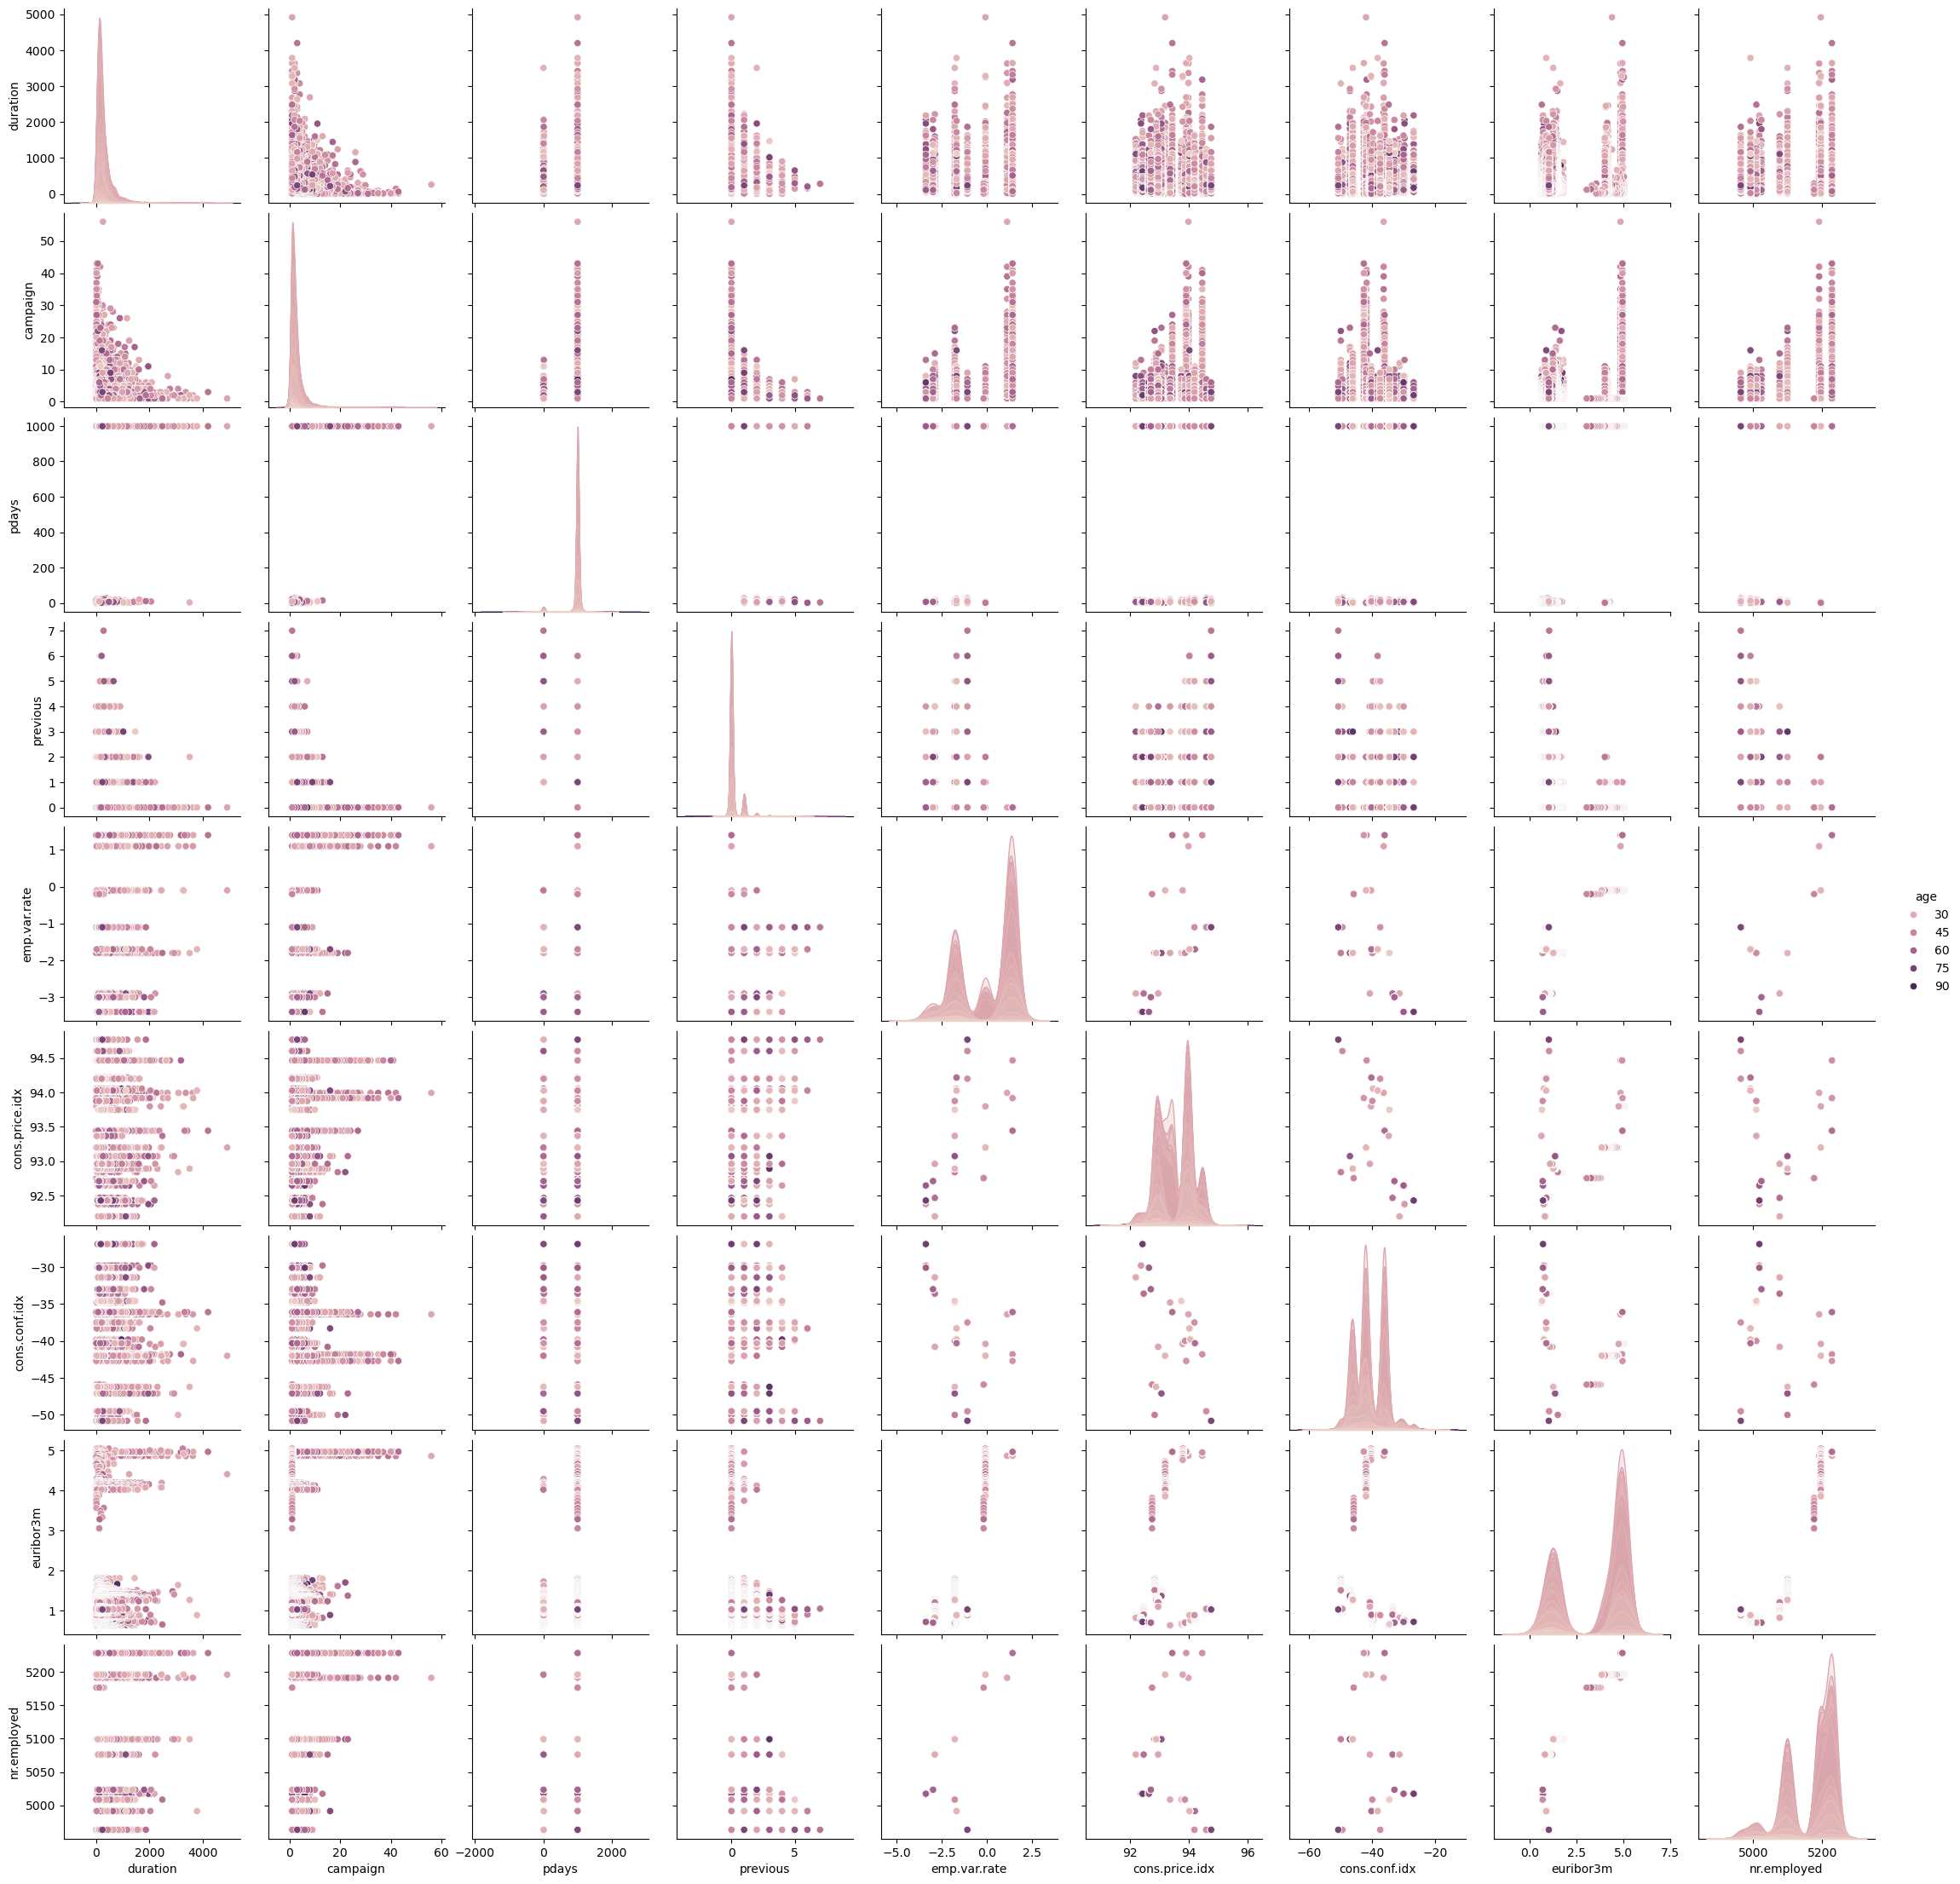

In [34]:
sns.pairplot(df,hue="age")
plt.show()